In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import scipy.stats as stat
import scipy as sp
import statistics

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

C:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
df = pd.read_csv('Result_final_1.csv')
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743257 entries, 0 to 1743256
Data columns (total 23 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   MandatId                           int64 
 1   DateCreation                       object
 2   BienMandatId                       int64 
 3   Statut                             int64 
 4   DescriptionBien_DateOffreAcceptee  object
 5   Origine_DateCollecte               object
 6   CritereId                          int64 
 7   SurfaceMin                         int64 
 8   NombrePiecesEnum                   int64 
 9   NombreChambresEnum                 int64 
 10  Departement_LocalisationId         int64 
 11  Region_LocalisationId              int64 
 12  LocalisationId                     int64 
 13  StatutMandat                       int64 
 14  TypeMission                        int64 
 15  TypeBien                           int64 
 16  TypeProjet                         i

In [4]:
df.drop(["MandatId", "BienMandatId","CritereId","Statut","StatutMandat","DateCreation", "DescriptionBien_DateOffreAcceptee","Origine_DateCollecte", "Departement_LocalisationId", "Region_LocalisationId", "LocalisationId"], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743257 entries, 0 to 1743256
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   SurfaceMin          int64 
 1   NombrePiecesEnum    int64 
 2   NombreChambresEnum  int64 
 3   TypeMission         int64 
 4   TypeBien            int64 
 5   TypeProjet          int64 
 6   BudgetMaxEuro       int64 
 7   CodePostal          int64 
 8   Ville               object
 9   Departement         object
 10  Region              object
 11  Succes              int64 
dtypes: int64(9), object(3)
memory usage: 159.6+ MB


In [6]:
X =df.drop(["Succes", "Ville", "Departement", "Region"], axis = 1)

In [7]:
y = df['Succes']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train.columns

Index(['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LightGBMClassifier

In [16]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [17]:
y_clf = clf.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_clf,target_names = ['Echec(Class 0)','Succès (Class 1)']))

                  precision    recall  f1-score   support

  Echec(Class 0)       0.80      0.95      0.87    272997
Succès (Class 1)       0.88      0.61      0.72    162818

        accuracy                           0.82    435815
       macro avg       0.84      0.78      0.80    435815
    weighted avg       0.83      0.82      0.81    435815



<AxesSubplot:>

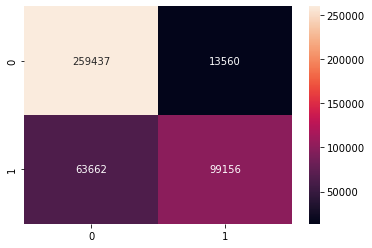

In [19]:
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

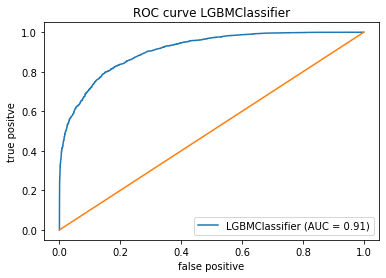

In [20]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LGBMClassifier')
plt.show()

# XGBClassifier

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train,eval_metric = "logloss",verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
y_xgb = xgb.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_xgb,target_names = ['Echec(Class 0)','Succès (Class 1)']))

                  precision    recall  f1-score   support

  Echec(Class 0)       0.88      0.94      0.91    272997
Succès (Class 1)       0.89      0.79      0.84    162818

        accuracy                           0.88    435815
       macro avg       0.89      0.87      0.87    435815
    weighted avg       0.89      0.88      0.88    435815



<AxesSubplot:>

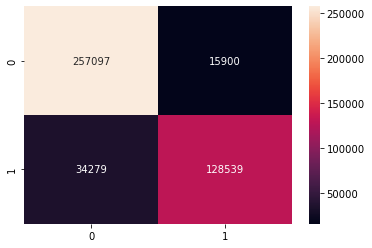

In [24]:
cm = confusion_matrix(y_test,xgb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

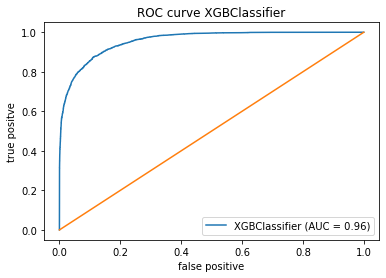

In [25]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve XGBClassifier')
plt.show()

# Xgboost + RandomSizeSearchCv

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import xgboost
#Hyper parameter optimization
params={
   "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    "min_child_weight": [1,3,5,7,9],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7]
}

classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=0)

random_search.fit(X_train, y_train)
random_search.best_estimator_

In [ ]:
#Build a model using the optimized hyperparameters
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=19,
              min_child_weight=7,monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test,classifier.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve XGBClassifier')
plt.show()

# XGBoost + GridSearchCV

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost
#Hyper parameter optimization
params={
   "learning_rate": [0.05, 0.10],
    "max_depth": [5,6,7,8]
}

classifier=xgboost.XGBClassifier()
GCV=GridSearchCV(classifier, params)

GCV.fit(X_train, y_train)
GCV.best_estimator_

In [ ]:
classifier2 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test,classifier2.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
X.columns

In [ ]:
classifier2.feature_importances_

In [ ]:
from xgboost import plot_importance
plot_importance(classifier2, )

In [ ]:
xgb.to_graphviz(boost, num_trees=2)

In [ ]:
classifier2.plot_importance(boost)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost
#Hyper parameter optimization
params={
   "learning_rate": [0.1, 0.15, 0.2],
    "max_depth": [8,9,10,11]
}

classifier3=xgboost.XGBClassifier()
GCV=GridSearchCV(classifier3, params)

GCV.fit(X_train, y_train)
GCV.best_estimator_

C:\Users\Lou Doussiet\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
y_pred2 = GCV.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    272997
           1       0.97      0.95      0.96    162818

    accuracy                           0.97    435815
   macro avg       0.97      0.97      0.97    435815
weighted avg       0.97      0.97      0.97    435815



<AxesSubplot:>

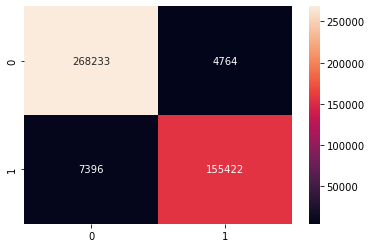

In [14]:
cm = confusion_matrix(y_test,GCV.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

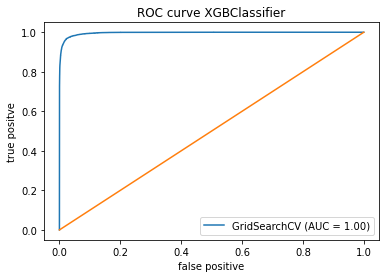

In [15]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve XGBClassifier')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost
#Hyper parameter optimization
params={
   "learning_rate": [0.2, 0.3, 0.4],
    "max_depth": [11, 12, 13]
}

classifier=xgboost.XGBClassifier()
GCV4=GridSearchCV(classifier, params)

GCV4.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, y_pred))

# Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', C =0.001, penalty = 'l2' )
lr.fit(X_train,y_train)

In [ ]:
y_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr,target_names = ['Echec(Class 0)','Succès (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LR')
plt.show()

from xgboost import XGBClassifier
clf2 = XGBClassifier(
        eval_metric = 'auc',
        num_class = 2,
        nthread = 4,
        silent = 1,
        )
parameters = {
        'num_boost_round': [100, 250, 500],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [6, 9, 12],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }
clf2 = GridSearchCV(clf2, parameters, n_jobs=1, cv=2)
clf2.fit(X_train, y_train)

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

In [ ]:
y_adb = adb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_adb,target_names = ['échec(Class 0)','succès (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,adb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(adb, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve AdaBoostClassifier')
plt.show()

# CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
cat.fit(X_train, y_train)

In [ ]:
preds_class = cat.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_class,target_names = ['échec(Class 0)','succès (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,cat.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cat, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve XGBClassifier')
plt.show()

In [ ]:
!pip install numpy

# DummyClassifier

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.get_params()

In [ ]:
y_dummy = dummy_clf.predict(X_test)

In [ ]:
prob = dummy_clf.predict_proba(X_test)

In [ ]:
sc = dummy_clf.score(X_train, y_train)
sc

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_dummy))

In [ ]:
!pip install fedot==0.5.2